In [1]:
from scipy import stats

In [2]:
import pandas as pd

df = pd.read_csv('archive/Childhood malnutrition.csv')
df.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,53.2,44.9,18.2
1,Afghanistan,AFG,2004,59.3,32.9,8.6
2,Afghanistan,AFG,2013,40.4,24.6,9.5
3,Afghanistan,AFG,2018,38.2,19.1,5.1
4,Albania,ALB,1997,20.4,7.1,8.1


In [3]:
df.size

5502

In [4]:
import numpy as np
import pycountry
# pip install pycountry-convert
import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

def get_continent(x):
    try:
        # Get from alpha_3
        return continents[pc.country_alpha2_to_continent_code(pycountry.countries.get(alpha_3=x).alpha_2)]
    except:
        return np.nan

In [5]:
df['Continent'] = df['Code'].apply(get_continent)

In [6]:
get_continent('AFG')

'Asia'

In [7]:
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent
780,Timor,TLS,2002,55.7,40.6,13.7,NaN
781,Timor,TLS,2003,54.8,41.5,14.3,NaN
782,Timor,TLS,2007,57.2,49.5,21.3,NaN
783,Timor,TLS,2009,57.5,44.9,18.9,NaN
784,Timor,TLS,2013,51.7,37.5,9.9,NaN


In [8]:
# Manually Adding a Continent for Timor
df['Continent'] = df['Continent'].replace(np.nan, 'Asia')

In [9]:
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent


In [10]:
df.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent
0,Afghanistan,AFG,1997,53.2,44.9,18.2,Asia
1,Afghanistan,AFG,2004,59.3,32.9,8.6,Asia
2,Afghanistan,AFG,2013,40.4,24.6,9.5,Asia
3,Afghanistan,AFG,2018,38.2,19.1,5.1,Asia
4,Albania,ALB,1997,20.4,7.1,8.1,Europe


In [11]:
df.rename(columns={"Prevalence of stunting, height for age (% of children under 5)": "Stunting","Prevalence of underweight, weight for age (% of children under 5)" : "Underweight","Prevalence of wasting, weight for height (% of children under 5)" : "Wasting"},inplace=True)


In [12]:
df.head()

,Entity,Code,Year,Stunting,Underweight,Wasting,Continent
0,Afghanistan,AFG,1997,53.2,44.9,18.2,Asia
1,Afghanistan,AFG,2004,59.3,32.9,8.6,Asia
2,Afghanistan,AFG,2013,40.4,24.6,9.5,Asia
3,Afghanistan,AFG,2018,38.2,19.1,5.1,Asia
4,Albania,ALB,1997,20.4,7.1,8.1,Europe


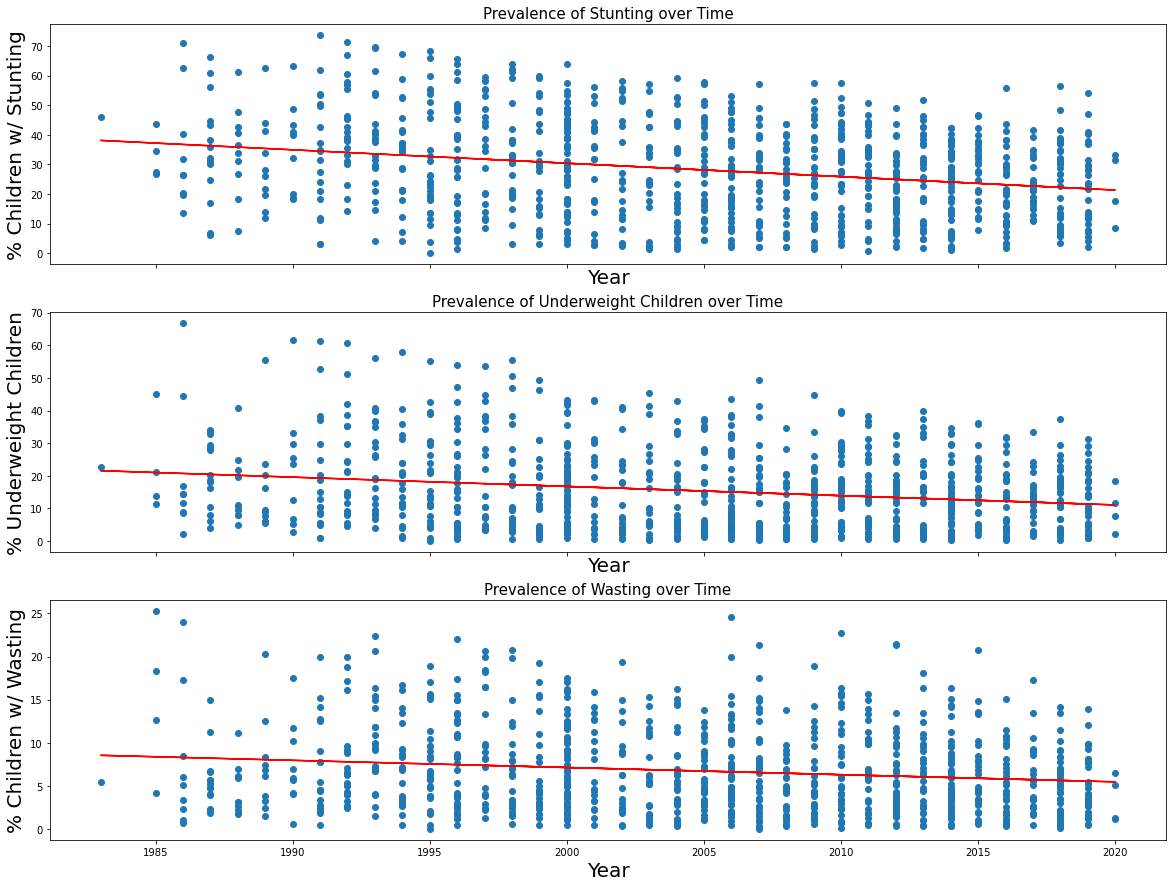

In [25]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True)


axs[0].scatter(df['Year'], df['Stunting'])
axs[0].set_title('Prevalence of Stunting over Time', fontsize=15)
axs[0].set_xlabel("Year", fontsize=20)
axs[0].set_ylabel("% Children w/ Stunting", fontsize=20)
res = stats.linregress(df['Year'], df['Stunting']) 
axs[0].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')


axs[1].scatter(df['Year'], df['Underweight'])
axs[1].set_title('Prevalence of Underweight Children over Time', fontsize=15)
axs[1].set_xlabel("Year", fontsize=20)
axs[1].set_ylabel("% Underweight Children" , fontsize=20)
res = stats.linregress(df['Year'], df['Underweight']) 
axs[1].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')

axs[2].scatter(df['Year'], df['Wasting'])
axs[2].set_title('Prevalence of Wasting over Time', fontsize=15)
axs[2].set_xlabel("Year", fontsize=20)
axs[2].set_ylabel("% Children w/ Wasting", fontsize=20)
res = stats.linregress(df['Year'], df['Wasting']) 
axs[2].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')

plt.show()

General decrease in attributes that make up malnutrition (stunting, underweight, wasting) over time. However, slope not that steep, so we see that it is still a big problem in the world today. 

In [26]:
average_df = df.drop(columns=['Year'])

In [35]:
average_df = average_df.groupby('Code').mean()
average_df.head()

,Stunting,Underweight,Wasting
Code,,,
AFG,47.775000,30.375,10.350000
AGO,42.633333,23.600,6.933333
ALB,24.160000,7.700,7.760000
ARG,10.025000,2.600,2.150000
ARM,16.120000,3.480,3.940000


In [36]:
import geopandas as gpd

In [37]:
# Get the country geomtery data
geo_df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

geo_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

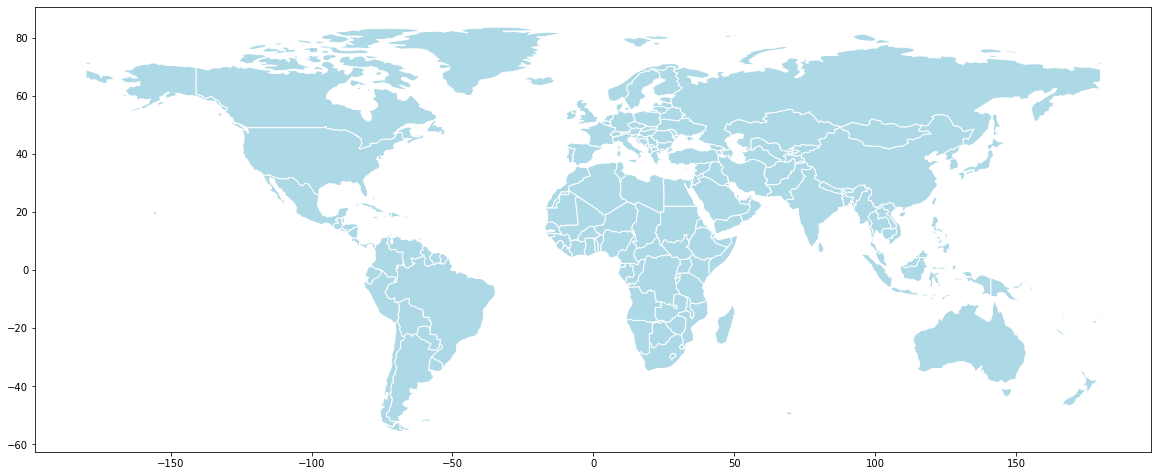

In [38]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['name'] == 'Antarctica'].index)

# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [40]:
merged_df = pd.merge(left=geo_df, right=average_df, how='left', left_on='iso_a3', right_on='Code')
merged_df = merged_df.dropna()
merged_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Stunting,Underweight,Wasting
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",5.900000,6.100000,8.050000
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",40.990909,17.727273,5.054545
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.909091,0.854545,0.427273
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",15.020000,3.760000,4.200000
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",23.700000,7.000000,6.475000


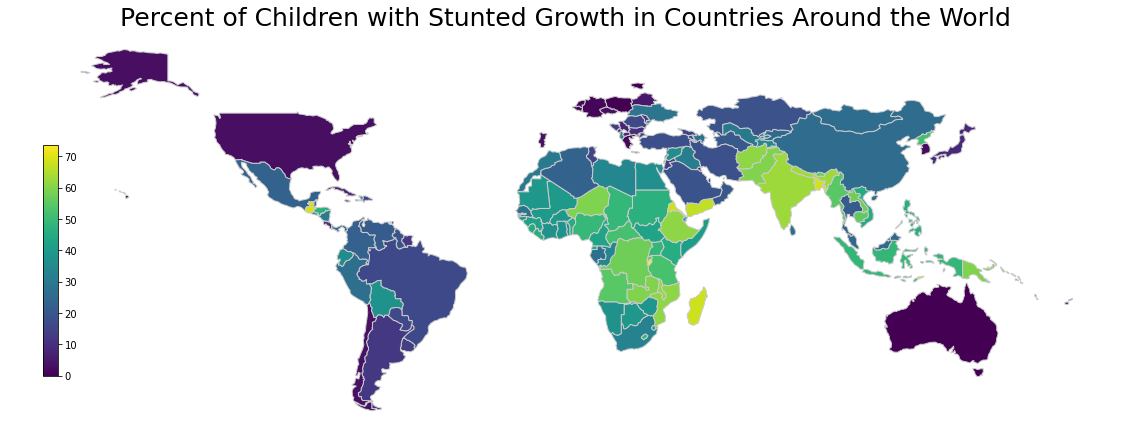

In [50]:
title = 'Percent of Children with Stunted Growth in Countries Around the World'
col = 'Stunting'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))


# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

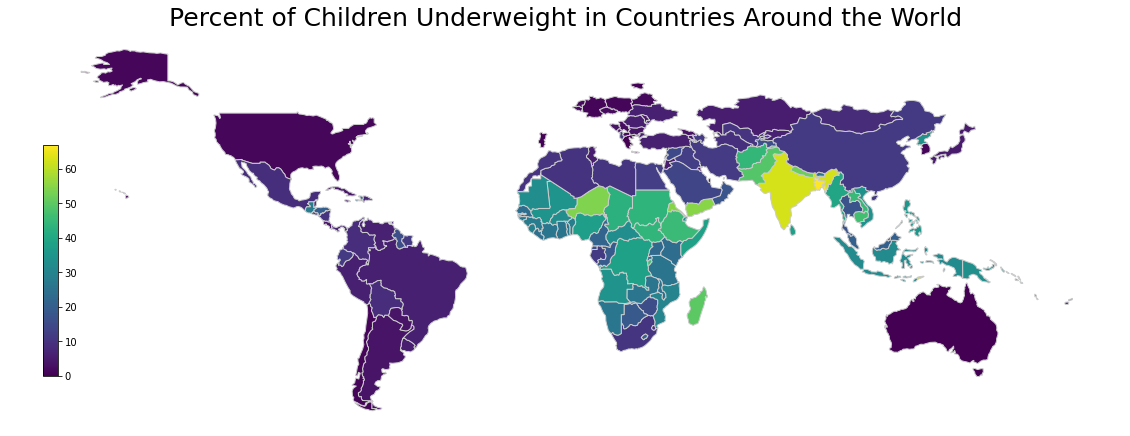

In [51]:
title = 'Percent of Children Underweight in Countries Around the World'
col = 'Underweight'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))


# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

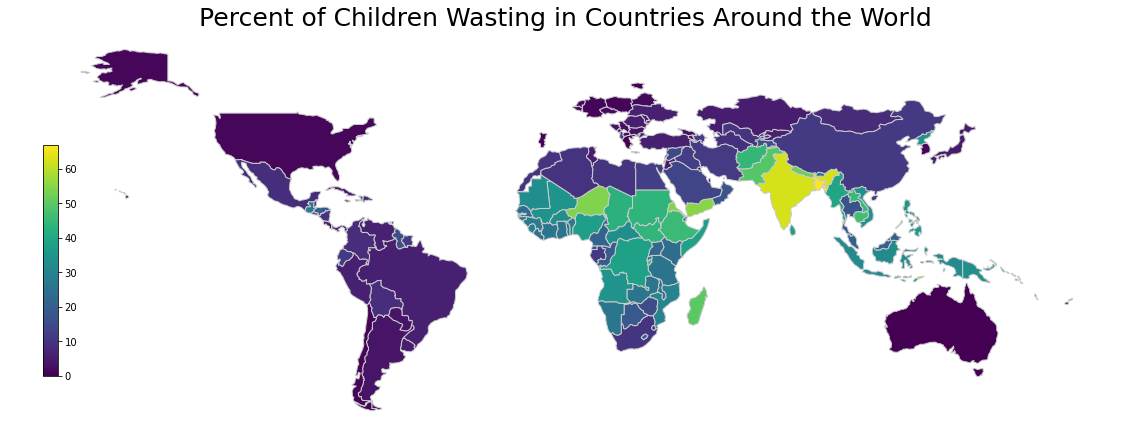

In [52]:
title = 'Percent of Children Wasting in Countries Around the World'
col = 'Underweight'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))


# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)